In [1]:
# Import necessary libraries
import cptac
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
import umap
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from hdbscan import HDBSCAN
from matplotlib.lines import Line2D

C:\Users\zhang\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# List CPTAC datasets
cptac.list_datasets()

,Description,Data reuse status,Publication link
Dataset name,,,
Brca,breast cancer,no restrictions,https://pubmed.ncbi.nlm.nih.gov/33212010/
Ccrcc,clear cell renal cell carcinoma (kidney),no restrictions,https://pubmed.ncbi.nlm.nih.gov/31675502/
Colon,colorectal cancer,no restrictions,https://pubmed.ncbi.nlm.nih.gov/31031003/
Endometrial,endometrial carcinoma (uterine),no restrictions,https://pubmed.ncbi.nlm.nih.gov/32059776/
Gbm,glioblastoma,no restrictions,https://pubmed.ncbi.nlm.nih.gov/33577785/
Hnscc,head and neck squamous cell carcinoma,no restrictions,https://pubmed.ncbi.nlm.nih.gov/33417831/
Lscc,lung squamous cell carcinoma,no restrictions,https://pubmed.ncbi.nlm.nih.gov/34358469/
Luad,lung adenocarcinoma,no restrictions,https://pubmed.ncbi.nlm.nih.gov/32649874/
Ovarian,high grade serous ovarian cancer,no restrictions,https://pubmed.ncbi.nlm.nih.gov/27372738/


In [3]:
# Download the dataset for ovarian cancer
cptac.download(dataset="Ovarian")
ovarian = cptac.Ovarian()

In [4]:
# List the available data
ovarian.list_data()

Below are the dataframes contained in this dataset and their dimensions:

clinical
	131 rows
	85 columns
CNV
	100 rows
	17156 columns
followup
	313 rows
	73 columns
phosphoproteomics
	103 rows
	110953 columns
proteomics
	103 rows
	10686 columns
somatic_mutation
	22399 rows
	3 columns
transcriptomics
	101 rows
	21991 columns
treatment
	199 rows
	8 columns


In [5]:
# Get protein, clinical, mutation, and rna data
protein = ovarian.get_proteomics()
protein.columns = protein.columns.get_level_values(0)
clinical = ovarian.get_clinical()
mutation = ovarian.get_somatic_mutation()
rna = ovarian.get_transcriptomics()

In [6]:
# Look at protein data
protein.head()

Name,A1BG,A2M,A2ML1,AAAS,AACS,AAGAB,AAK1,AAMDC,AAMP,AAR2,...,ZSCAN31,ZSCAN32,ZSWIM8,ZW10,ZWILCH,ZWINT,ZYG11B,ZYX,ZZEF1,ZZZ3
Patient_ID,,,,,,,,,,,,,,,,,,,,,
01OV007,0.133634,0.765120,-0.778849,0.118236,0.112740,0.054942,0.313055,-0.786270,-0.384680,0.064017,...,-0.382350,-0.323516,0.074209,0.232999,-0.195793,NaN,-0.145053,0.590217,0.019414,NaN
01OV017,-0.432786,-0.461906,-0.533497,0.041800,0.604114,0.351294,0.546605,0.603935,-0.235374,0.059084,...,-0.008922,0.032004,0.016276,0.587911,0.574339,NaN,0.075401,-0.437564,-0.208831,NaN
01OV018,-0.013943,0.065842,NaN,-0.010514,0.541935,0.169826,-0.023032,-0.057549,-0.397627,0.199581,...,0.003784,0.002237,0.206993,0.111037,1.020321,NaN,-0.245864,0.008411,0.130504,-0.367433
01OV023,1.234203,1.512082,-0.703050,0.181152,0.087719,0.226861,-0.100766,-0.516022,-0.456512,-0.257629,...,-0.277046,NaN,-0.529948,0.034713,0.149523,-0.313370,-0.507473,0.221818,0.278313,-1.008998
01OV026,-0.482872,0.343872,-1.150936,0.315155,0.097235,-0.160208,-0.125165,-0.768776,-0.372368,0.450086,...,-0.096284,-0.752819,-0.181027,0.179612,0.007854,-0.106049,0.377063,-0.295592,0.011997,-0.236003


In [7]:
# Look at clinical data
clinical.head() 

Name,Sample_Tumor_Normal,Participant_Procurement_Age,Participant_Gender,Participant_Race,Participant_Ethnicity,Participant_Jewish_Heritage,Participant_History_Malignancy,Participant_History_Chemotherapy,Participant_History_Neo-adjuvant_Treatment,Participant_History_Radiation_Therapy,...,New_Tumor_Event_Site,Other_New_Tumor_Event_Site,Days_Between_Collection_And_New_Tumor_Event,New_Tumor_Event_Diagnosis,New_Tumor_Event_Surgery,Days_Between_Collection_And_New_Tumor_Event_Surgery,New_Tumor_Event_Chemotherapy,New_Tumor_Event_Immunotherapy,New_Tumor_Event_Hormone_Therapy,New_Tumor_Event_Targeted_Molecular_Therapy
Patient_ID,,,,,,,,,,,,,,,,,,,,,
01OV002,Tumor,540.0,Female,White,Not Hispanic or Latino,Not Jewish,No,No,No,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01OV007,Tumor,820.0,Female,White,Not Hispanic or Latino,Unknown,No,No,No,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01OV008,Tumor,665.0,Female,White,Not Hispanic or Latino,Not Jewish,No,No,No,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01OV010,Tumor,625.0,Female,Black or African American,Unknown,Unknown,No,No,No,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01OV013,Tumor,828.0,Female,White,Not Hispanic or Latino,Not Jewish,No,No,No,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# Look at mutation data
mutation.head()

Name,Gene,Mutation,Location
Patient_ID,,,
01OV007,ALPK1,Missense_Mutation,p.C39F
01OV007,AP4B1,Missense_Mutation,p.C420Y
01OV007,ARHGAP6,Missense_Mutation,p.E274V
01OV007,ARMC6,Missense_Mutation,p.L319V
01OV007,BAI2,Missense_Mutation,p.A229P


In [9]:
# Look at RNA data
rna.head()

Name,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2MP1,A3GALT2,A4GALT,A4GNT,AA06,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
Patient_ID,,,,,,,,,,,,,,,,,,,,,
01OV002,0.364000,0.006166,47.7384,0.0,0.272554,0.027215,0.065777,5.00557,0.0,0.0,...,12.7202,60.8385,1.734470,2.816760,5.89275,1.384150,8.26588,11.75730,2.264400,21.8805
01OV007,0.728112,0.000000,84.2226,0.0,0.031258,0.000000,0.000000,4.88346,0.0,0.0,...,9.0938,18.8951,0.572400,0.701954,4.01544,0.111984,4.11415,19.84100,1.384810,18.5675
01OV008,0.161232,0.000000,39.4228,0.0,0.039369,0.000000,0.000000,4.00266,0.0,0.0,...,0.0000,18.8759,1.425120,1.822010,2.97880,0.153857,2.91195,0.00000,2.359430,17.2076
01OV010,2.362500,0.000000,89.5759,0.0,0.915590,0.000000,0.000000,2.43968,0.0,0.0,...,10.0336,50.4629,0.835355,0.642220,1.96876,0.014043,6.17068,1.77563,0.821267,34.4884
01OV013,0.529878,0.000000,65.2893,0.0,0.005661,0.138317,0.000000,2.66998,0.0,0.0,...,16.0577,27.1056,0.638152,0.732492,3.43952,0.034667,3.73611,9.84522,1.920880,15.3081


In [74]:
# Create new dataframe with information for the tumor stage, adding the tumor stage from the clinical data and make the rows names the same
tumor_status = pd.DataFrame()
tumor_status['Tumor_Stage_Ovary_FIGO'] = clinical['Tumor_Stage_Ovary_FIGO']
tumor_status.index = clinical.index

In [75]:
# Add age to analysis from clinical data
tumor_status = pd.concat([tumor_status, clinical['Participant_Procurement_Age']], axis=1, join="inner")
tumor_status = pd.concat([tumor_status, clinical['Origin_Site_Disease']], axis=1, join="inner")
tumor_status = pd.concat([tumor_status, clinical['Anatomic_Site_Tumor']], axis=1, join="inner")

sig_genes = ['TP53', 'NF1', 'USH2A', 'MUC16', 'PIK3CA', 'CCND1', 'CCND2']
# For these genes, chosen because they are some of the top mutated genes and have enough data for analysis, add RNA data
for gene in sig_genes:
  column_name = "rna" + "_" + gene
  column = rna[gene]
  tumor_status = pd.concat([tumor_status, column], axis=1, join="inner")
  tumor_status = tumor_status.rename(columns={gene: column_name})
sig_genes = ['TP53', 'NF1', 'MUC16', 'PIK3CA']
# Do the same for gene data
for gene in sig_genes:
  column_name = "protein" + "_" + gene
  column = protein[gene]
  tumor_status = pd.concat([tumor_status, column], axis=1, join="inner")
  tumor_status = tumor_status.rename(columns={gene: column_name})
# Create a copy of the tumor status without adding mutation data, used for later analysis
tumor_status_cut = tumor_status.copy() 
tumor_status = tumor_status.drop('Origin_Site_Disease', axis=1)
tumor_status = tumor_status.drop("Anatomic_Site_Tumor", axis=1)
sig_genes = ['TP53', 'TTN', 'NF1', 'USH2A', 'CSMD3', 'PIK3CA', 'BRCA1', 'BRCA2', 'PTEN']
# Add columns for these genes and add placeholder [No_Mutation]
for gene in sig_genes:
  column_name = 'mutation' + '_' + gene
  tumor_status[column_name] = "[No_Mutation]"
tumor_status

,Tumor_Stage_Ovary_FIGO,Participant_Procurement_Age,rna_TP53,rna_NF1,rna_USH2A,rna_MUC16,rna_PIK3CA,rna_CCND1,rna_CCND2,protein_TP53,...,protein_PIK3CA,mutation_TP53,mutation_TTN,mutation_NF1,mutation_USH2A,mutation_CSMD3,mutation_PIK3CA,mutation_BRCA1,mutation_BRCA2,mutation_PTEN
Patient_ID,,,,,,,,,,,,,,,,,,,,,
01OV007,IV,820.0,4.31818,4.33494,0.027118,0.610827,18.54420,20.34080,2.48019,-1.600876,...,0.099343,[No_Mutation],[No_Mutation],[No_Mutation],[No_Mutation],[No_Mutation],[No_Mutation],[No_Mutation],[No_Mutation],[No_Mutation]
01OV017,IIIC,672.0,4.09583,3.94289,0.626625,0.416383,32.03840,3.18948,2.16987,-1.685874,...,0.338230,[No_Mutation],[No_Mutation],[No_Mutation],[No_Mutation],[No_Mutation],[No_Mutation],[No_Mutation],[No_Mutation],[No_Mutation]
01OV018,IIIC,535.0,20.66630,2.74343,0.025204,19.101100,25.40330,34.81800,1.96658,0.846640,...,0.275083,[No_Mutation],[No_Mutation],[No_Mutation],[No_Mutation],[No_Mutation],[No_Mutation],[No_Mutation],[No_Mutation],[No_Mutation]
01OV023,IIIC,707.0,26.10840,9.98804,0.061530,13.822900,13.31460,6.30991,2.42189,0.419432,...,-0.748014,[No_Mutation],[No_Mutation],[No_Mutation],[No_Mutation],[No_Mutation],[No_Mutation],[No_Mutation],[No_Mutation],[No_Mutation]
01OV026,IIIC,932.0,5.64030,7.47088,0.353605,66.019400,10.14490,5.72253,2.56212,-2.459607,...,-0.177637,[No_Mutation],[No_Mutation],[No_Mutation],[No_Mutation],[No_Mutation],[No_Mutation],[No_Mutation],[No_Mutation],[No_Mutation]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26OV002,IIIC,695.0,7.65173,9.11271,0.000000,0.543333,7.53205,9.78472,3.23738,-0.124787,...,-0.079463,[No_Mutation],[No_Mutation],[No_Mutation],[No_Mutation],[No_Mutation],[No_Mutation],[No_Mutation],[No_Mutation],[No_Mutation]
26OV008,IV,782.0,4.99107,4.57745,0.055173,0.599534,5.17682,6.51872,132.62600,-1.076378,...,-0.289266,[No_Mutation],[No_Mutation],[No_Mutation],[No_Mutation],[No_Mutation],[No_Mutation],[No_Mutation],[No_Mutation],[No_Mutation]
26OV009,IIIC,728.0,39.87700,6.33702,0.010546,104.729000,18.30220,119.33000,2.47131,-0.514518,...,-0.172272,[No_Mutation],[No_Mutation],[No_Mutation],[No_Mutation],[No_Mutation],[No_Mutation],[No_Mutation],[No_Mutation],[No_Mutation]


In [76]:
# Create copy of mutation dataframe so we can remove rows and such
mutation_df = pd.DataFrame(mutation)

In [77]:
# Check the head
mutation_df.head()

Name,Gene,Mutation,Location
Patient_ID,,,
01OV007,ALPK1,Missense_Mutation,p.C39F
01OV007,AP4B1,Missense_Mutation,p.C420Y
01OV007,ARHGAP6,Missense_Mutation,p.E274V
01OV007,ARMC6,Missense_Mutation,p.L319V
01OV007,BAI2,Missense_Mutation,p.A229P


In [78]:
# For those genes, add what mutation there would be if there is a mutation into the tumor_status dataframe given the patient and the gene
sig_genes = ['TP53', 'TTN', 'NF1', 'USH2A', 'CSMD3', 'PIK3CA', 'BRCA1', 'BRCA2', 'PTEN']
for patient in tumor_status.index:
  for gene in sig_genes:
    column_name = 'mutation' + '_' + gene
    # Use a try-except error to prevent throwing errors for non-existent values
    try:
      value = mutation_df.loc[(mutation_df.index == patient) & (mutation_df['Gene'] == gene), 'Mutation']
      # print(value.values)
      tumor_status.loc[patient, column_name] = value.values.astype(str)
    except:
      pass
tumor_status.head()

,Tumor_Stage_Ovary_FIGO,Participant_Procurement_Age,rna_TP53,rna_NF1,rna_USH2A,rna_MUC16,rna_PIK3CA,rna_CCND1,rna_CCND2,protein_TP53,...,protein_PIK3CA,mutation_TP53,mutation_TTN,mutation_NF1,mutation_USH2A,mutation_CSMD3,mutation_PIK3CA,mutation_BRCA1,mutation_BRCA2,mutation_PTEN
Patient_ID,,,,,,,,,,,,,,,,,,,,,
01OV007,IV,820.0,4.31818,4.33494,0.027118,0.610827,18.5442,20.34080,2.48019,-1.600876,...,0.099343,[Frame_Shift_Del],[Missense_Mutation],[No_Mutation],[No_Mutation],[No_Mutation],[No_Mutation],[No_Mutation],[No_Mutation],[No_Mutation]
01OV017,IIIC,672.0,4.09583,3.94289,0.626625,0.416383,32.0384,3.18948,2.16987,-1.685874,...,0.338230,[Frame_Shift_Del],[No_Mutation],[No_Mutation],[No_Mutation],[No_Mutation],[No_Mutation],[No_Mutation],[No_Mutation],[No_Mutation]
01OV018,IIIC,535.0,20.66630,2.74343,0.025204,19.101100,25.4033,34.81800,1.96658,0.846640,...,0.275083,[Missense_Mutation],[No_Mutation],[No_Mutation],[No_Mutation],[No_Mutation],[No_Mutation],[No_Mutation],[No_Mutation],[No_Mutation]
01OV023,IIIC,707.0,26.10840,9.98804,0.061530,13.822900,13.3146,6.30991,2.42189,0.419432,...,-0.748014,[Missense_Mutation],[No_Mutation],[No_Mutation],[No_Mutation],[Missense_Mutation],[Missense_Mutation],[No_Mutation],[No_Mutation],[No_Mutation]
01OV026,IIIC,932.0,5.64030,7.47088,0.353605,66.019400,10.1449,5.72253,2.56212,-2.459607,...,-0.177637,[Frame_Shift_Ins],[No_Mutation],[No_Mutation],[Missense_Mutation],[No_Mutation],[No_Mutation],[No_Mutation],[No_Mutation],[No_Mutation]


In [79]:
# Drop NAs and remove those with unknown or not reported tumor stages
tumor_status = tumor_status.dropna()
tumor_status = tumor_status[tumor_status['Tumor_Stage_Ovary_FIGO'] != 'Not Reported/ Unknown']
# Check how many patients are left and look at the data
tumor_status.head()

,Tumor_Stage_Ovary_FIGO,Participant_Procurement_Age,rna_TP53,rna_NF1,rna_USH2A,rna_MUC16,rna_PIK3CA,rna_CCND1,rna_CCND2,protein_TP53,...,protein_PIK3CA,mutation_TP53,mutation_TTN,mutation_NF1,mutation_USH2A,mutation_CSMD3,mutation_PIK3CA,mutation_BRCA1,mutation_BRCA2,mutation_PTEN
Patient_ID,,,,,,,,,,,,,,,,,,,,,
01OV007,IV,820.0,4.31818,4.33494,0.027118,0.610827,18.5442,20.34080,2.48019,-1.600876,...,0.099343,[Frame_Shift_Del],[Missense_Mutation],[No_Mutation],[No_Mutation],[No_Mutation],[No_Mutation],[No_Mutation],[No_Mutation],[No_Mutation]
01OV017,IIIC,672.0,4.09583,3.94289,0.626625,0.416383,32.0384,3.18948,2.16987,-1.685874,...,0.338230,[Frame_Shift_Del],[No_Mutation],[No_Mutation],[No_Mutation],[No_Mutation],[No_Mutation],[No_Mutation],[No_Mutation],[No_Mutation]
01OV018,IIIC,535.0,20.66630,2.74343,0.025204,19.101100,25.4033,34.81800,1.96658,0.846640,...,0.275083,[Missense_Mutation],[No_Mutation],[No_Mutation],[No_Mutation],[No_Mutation],[No_Mutation],[No_Mutation],[No_Mutation],[No_Mutation]
01OV023,IIIC,707.0,26.10840,9.98804,0.061530,13.822900,13.3146,6.30991,2.42189,0.419432,...,-0.748014,[Missense_Mutation],[No_Mutation],[No_Mutation],[No_Mutation],[Missense_Mutation],[Missense_Mutation],[No_Mutation],[No_Mutation],[No_Mutation]
01OV026,IIIC,932.0,5.64030,7.47088,0.353605,66.019400,10.1449,5.72253,2.56212,-2.459607,...,-0.177637,[Frame_Shift_Ins],[No_Mutation],[No_Mutation],[Missense_Mutation],[No_Mutation],[No_Mutation],[No_Mutation],[No_Mutation],[No_Mutation]


In [16]:
tumor_status.head()

,Tumor_Stage_Ovary_FIGO,Participant_Procurement_Age,rna_TP53,rna_NF1,rna_USH2A,rna_MUC16,rna_PIK3CA,rna_CCND1,rna_CCND2,protein_TP53,...,protein_PIK3CA,mutation_TP53,mutation_TTN,mutation_NF1,mutation_USH2A,mutation_CSMD3,mutation_PIK3CA,mutation_BRCA1,mutation_BRCA2,mutation_PTEN
Patient_ID,,,,,,,,,,,,,,,,,,,,,
01OV007,IV,820.0,4.31818,4.33494,0.027118,0.610827,18.5442,20.34080,2.48019,-1.600876,...,0.099343,[Frame_Shift_Del],[Missense_Mutation],[No_Mutation],[No_Mutation],[No_Mutation],[No_Mutation],[No_Mutation],[No_Mutation],[No_Mutation]
01OV017,IIIC,672.0,4.09583,3.94289,0.626625,0.416383,32.0384,3.18948,2.16987,-1.685874,...,0.338230,[Frame_Shift_Del],[No_Mutation],[No_Mutation],[No_Mutation],[No_Mutation],[No_Mutation],[No_Mutation],[No_Mutation],[No_Mutation]
01OV018,IIIC,535.0,20.66630,2.74343,0.025204,19.101100,25.4033,34.81800,1.96658,0.846640,...,0.275083,[Missense_Mutation],[No_Mutation],[No_Mutation],[No_Mutation],[No_Mutation],[No_Mutation],[No_Mutation],[No_Mutation],[No_Mutation]
01OV023,IIIC,707.0,26.10840,9.98804,0.061530,13.822900,13.3146,6.30991,2.42189,0.419432,...,-0.748014,[Missense_Mutation],[No_Mutation],[No_Mutation],[No_Mutation],[Missense_Mutation],[Missense_Mutation],[No_Mutation],[No_Mutation],[No_Mutation]
01OV026,IIIC,932.0,5.64030,7.47088,0.353605,66.019400,10.1449,5.72253,2.56212,-2.459607,...,-0.177637,[Frame_Shift_Ins],[No_Mutation],[No_Mutation],[Missense_Mutation],[No_Mutation],[No_Mutation],[No_Mutation],[No_Mutation],[No_Mutation]


In [81]:
# Set the encoder
encoder = OrdinalEncoder()
# Encode the rows with categorical values
categorical_vars = ['Tumor_Stage_Ovary_FIGO', "mutation_TP53", "mutation_TTN", "mutation_NF1", "mutation_USH2A", "mutation_CSMD3", "mutation_PIK3CA", "mutation_BRCA1", "mutation_BRCA2", "mutation_PTEN"]
tumor_status.loc[:, categorical_vars] = tumor_status.loc[:, categorical_vars].astype(str)
encoded_columns = encoder.fit_transform(tumor_status.loc[:, categorical_vars])
tumor_status.loc[:, categorical_vars] = encoded_columns

# Make the data dataframe without the target values and the target dataframe with just the tumor stage values
tumor_status_data = tumor_status.drop('Tumor_Stage_Ovary_FIGO', axis=1)
tumor_status_target = tumor_status['Tumor_Stage_Ovary_FIGO']

# Scale the data
scaler = StandardScaler()
tumor_status_scaled = scaler.fit_transform(tumor_status_data)

# Train using different classifiers
classifiers = [KNeighborsClassifier(), DecisionTreeClassifier(),MLPClassifier(), GaussianNB()]
X_train, X_test, y_train, y_test = train_test_split(tumor_status_scaled, tumor_status_target, train_size=0.75)

for i in range(len(classifiers)):
    model = classifiers[i]
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = sum(y_pred == y_test) / len(y_test)
    print(f"{classifiers[i]}: {accuracy}")


C:\Users\zhang\AppData\Local\Temp\ipykernel_27968\3264572245.py:7: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  tumor_status.loc[:, categorical_vars] = encoded_columns


KNeighborsClassifier(): 0.7368421052631579
DecisionTreeClassifier(): 0.3684210526315789
MLPClassifier(): 0.631578947368421
GaussianNB(): 0.05263157894736842


C:\Users\zhang\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
# For the reducers, graph what the reduced data would look like to compare which one is better not using the mutation data
reducers = [PCA(), TSNE(), umap.UMAP()]
reducers_names = ['PCA', 't-SNE', 'UMAP']
encoder = OrdinalEncoder()
# Encode categorical variables
tumor_status_cut.loc[:, ['Tumor_Stage_Ovary_FIGO', 'Anatomic_Site_Tumor', 'Origin_Site_Disease']] = tumor_status_cut.loc[:, ['Tumor_Stage_Ovary_FIGO', 'Anatomic_Site_Tumor', 'Origin_Site_Disease']].astype(str)
encoded_columns = encoder.fit_transform(tumor_status_cut.loc[:, ['Tumor_Stage_Ovary_FIGO', 'Anatomic_Site_Tumor', 'Origin_Site_Disease']])
tumor_status_cut.loc[:, ['Tumor_Stage_Ovary_FIGO', 'Anatomic_Site_Tumor', 'Origin_Site_Disease']] = encoded_columns
tumor_status_cut_targets = tumor_status_cut[['Tumor_Stage_Ovary_FIGO', 'Anatomic_Site_Tumor', 'Origin_Site_Disease']]
tumor_status_cut = tumor_status_cut.drop(columns=['Tumor_Stage_Ovary_FIGO', 'Anatomic_Site_Tumor', 'Origin_Site_Disease'], axis=1)

C:\Users\zhang\AppData\Local\Temp\ipykernel_27968\2615158394.py:9: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  axs[i].scatter(x_vals, y_vals, cmap='nipy_spectral', alpha=0.5)
C:\Users\zhang\AppData\Local\Temp\ipykernel_27968\2615158394.py:9: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  axs[i].scatter(x_vals, y_vals, cmap='nipy_spectral', alpha=0.5)
C:\Users\zhang\AppData\Local\Temp\ipykernel_27968\2615158394.py:9: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  axs[i].scatter(x_vals, y_vals, cmap='nipy_spectral', alpha=0.5)


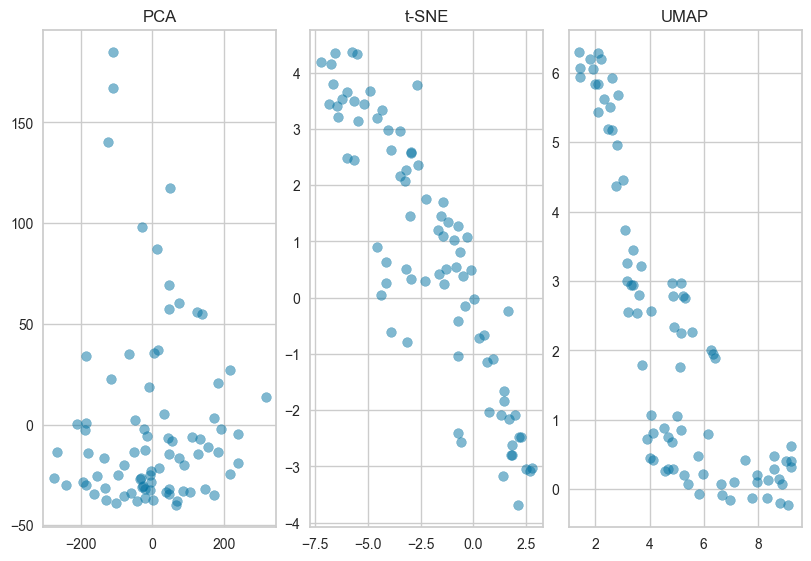

In [19]:
# Scale the data and plot the reduced data
scaler = StandardScaler()
tumor_status_scaled = scaler.fit_transform(tumor_status_cut.astype(float))
fig, axs = plt.subplots(1, 3, constrained_layout=True)
for i in range(3):
    embedding = reducers[i].fit_transform(tumor_status_cut)
    x_vals = embedding[:, 0]
    y_vals = embedding[:, 1]
    axs[i].scatter(x_vals, y_vals, cmap='nipy_spectral', alpha=0.5)
    axs[i].set_title(reducers_names[i])

C:\Users\zhang\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\zhang\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\zhang\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\U

KElbowVisualizer(ax=<Axes: >, estimator=KMeans(n_clusters=10), k=(1, 11))

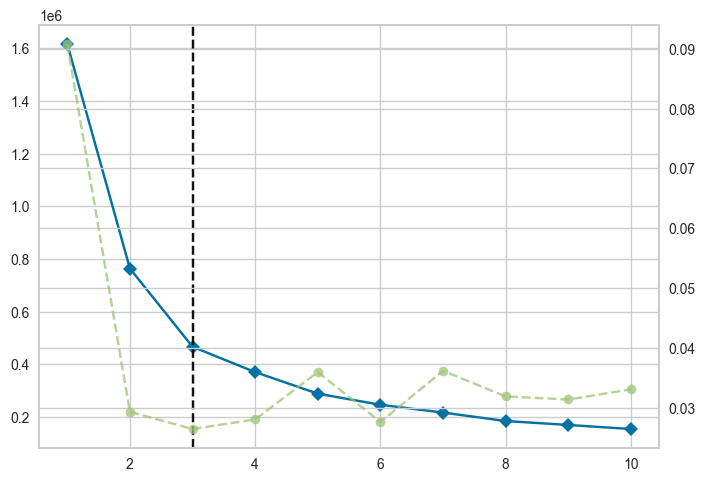

In [20]:
# Figure out optimal number of clusters 
visualizer = KElbowVisualizer(KMeans(), k=(1,11))
visualizer.fit(tumor_status_cut)

C:\Users\zhang\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0.5, 1.0, 'Origin Site Disease')

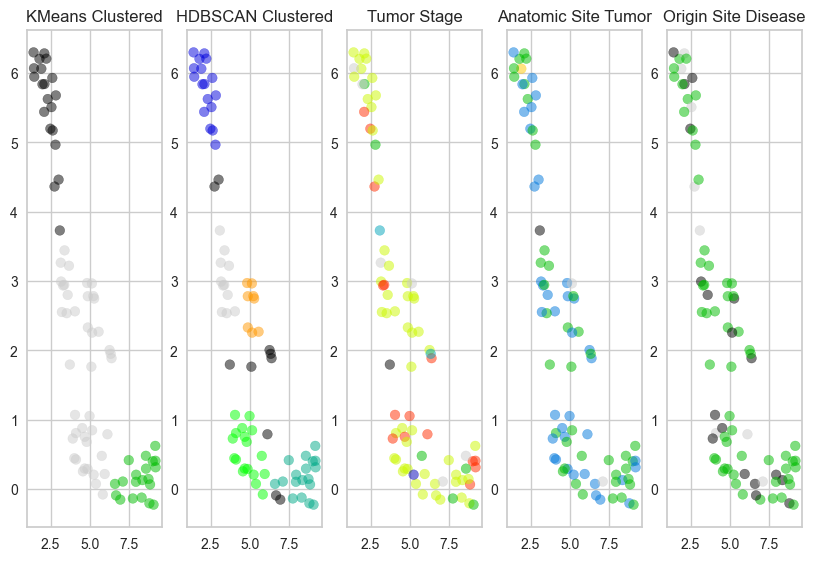

In [21]:
fig, axs = plt.subplots(1, 5, constrained_layout=True)

KMeans_model = KMeans(n_clusters = 3)
HBDSCAN_model = HDBSCAN()
# Plot cluster labeling using KMeans and HDBSCAN
# Compare to cluster labeling using tumor stage, anatomic site, and origin site
K_labels = KMeans_model.fit_predict(embedding)
H_labels = HBDSCAN_model.fit_predict(embedding)
axs[0].scatter(embedding[:, 0], embedding[:, 1], c=K_labels, cmap='nipy_spectral', alpha=0.5)
axs[0].set_title('KMeans Clustered')
axs[1].scatter(embedding[:, 0], embedding[:, 1], c=H_labels, cmap='nipy_spectral', alpha=0.5)
axs[1].set_title('HDBSCAN Clustered')
axs[2].scatter(embedding[:, 0], embedding[:, 1], c=tumor_status_cut_targets['Tumor_Stage_Ovary_FIGO'], cmap='nipy_spectral', alpha=0.5)
axs[2].set_title('Tumor Stage')
axs[3].scatter(embedding[:, 0], embedding[:, 1], c=tumor_status_cut_targets['Anatomic_Site_Tumor'], cmap='nipy_spectral', alpha=0.5)
axs[3].set_title('Anatomic Site Tumor')
axs[4].scatter(embedding[:, 0], embedding[:, 1], c=tumor_status_cut_targets['Origin_Site_Disease'], cmap='nipy_spectral', alpha=0.5)
axs[4].set_title('Origin Site Disease')

In [49]:
# Create list of possible stages
stage = tumor_status['Tumor_Stage_Ovary_FIGO'].unique()
colors = {0:'#48006E', 1:'#9232E6', 2:'#DA75FF', 3:'#3CF5FF', 4:'#0061E2', 5:'#002B71'}

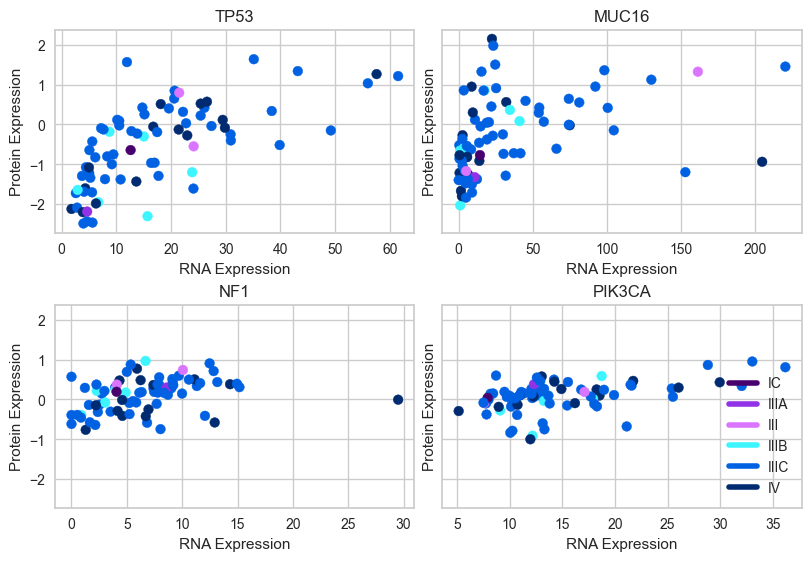

In [83]:
# Look at correlation between RNA and protein expression for TP53 and NF1 using he same y-axis
fig, axs = plt.subplots(2, 2, constrained_layout=True, sharey=True)
genes = ['TP53', 'NF1', 'MUC16', 'PIK3CA']
i=0
for gene in genes:
    j = 0 if i < 2 else 1
    axs[i%2][j].scatter(tumor_status["rna_" + gene], tumor_status["protein_" + gene], c=tumor_status['Tumor_Stage_Ovary_FIGO'].map(colors))
    axs[i%2][j].set_title(gene)
    axs[i%2][j].set_xlabel("RNA Expression")
    axs[i%2][j].set_ylabel("Protein Expression")
    i+=1
custom_lines = [Line2D([0], [0], color='#48006E', lw=4),
                Line2D([0], [0], color='#9232E6', lw=4),
                Line2D([0], [0], color='#DA75FF', lw=4),
                Line2D([0], [0], color='#3CF5FF', lw=4),
                Line2D([0], [0], color='#0061E2', lw=4),
                Line2D([0], [0], color='#002B71', lw=4)]
plt.legend(custom_lines, ['IC', 'IIIA', 'III', 'IIIB', 'IIIC', 'IV'])

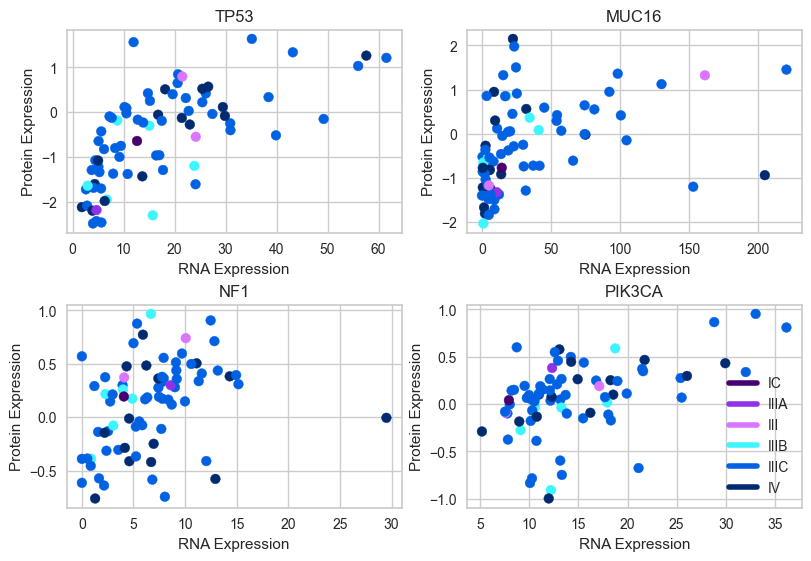

In [84]:
# Look at correlation between RNA and protein expression for TP53 and NF1 without the same y-axis
fig, axs = plt.subplots(2, 2, constrained_layout=True)
genes = ['TP53', 'NF1', 'MUC16', 'PIK3CA']
i=0
for gene in genes:
    j = 0 if i < 2 else 1
    axs[i%2][j].scatter(tumor_status["rna_" + gene], tumor_status["protein_" + gene], c=tumor_status['Tumor_Stage_Ovary_FIGO'].map(colors))
    axs[i%2][j].set_title(gene)
    axs[i%2][j].set_xlabel("RNA Expression")
    axs[i%2][j].set_ylabel("Protein Expression")
    i+=1
custom_lines = [Line2D([0], [0], color='#48006E', lw=4),
                Line2D([0], [0], color='#9232E6', lw=4),
                Line2D([0], [0], color='#DA75FF', lw=4),
                Line2D([0], [0], color='#3CF5FF', lw=4),
                Line2D([0], [0], color='#0061E2', lw=4),
                Line2D([0], [0], color='#002B71', lw=4)]
plt.legend(custom_lines, ['IC', 'IIIA', 'III', 'IIIB', 'IIIC', 'IV'])